In [11]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt

data = pd.read_csv('occupancy_data/datatraining.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [12]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00149')
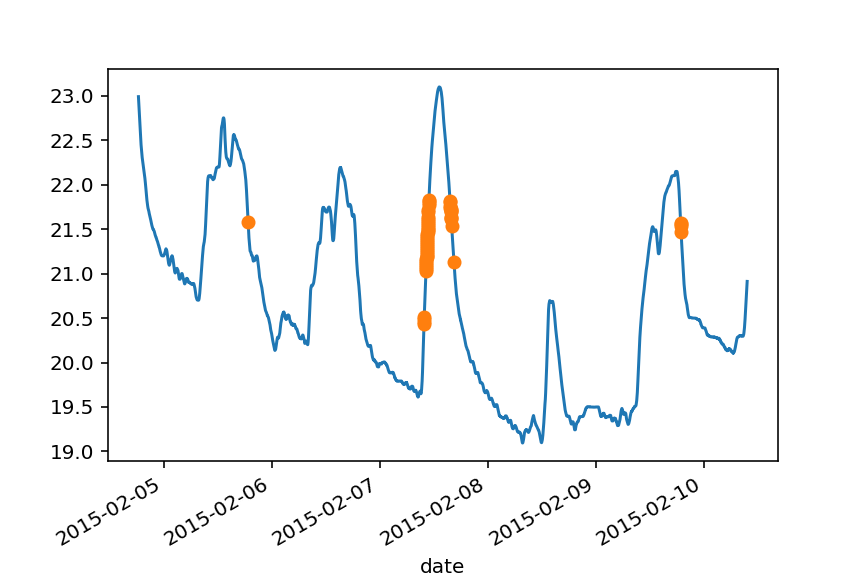

In [13]:
find_outliers(variable='Temperature', window=20, sigma=10)

# This is the very first time panel is ever mentioned in this notebook.
# Do you now see its relationship with otherwise unrelated functions?

# You pass a plotting function that contains adjustable parameters to pn.interact()
# I assume pn.extension() is an initializer.

import panel as pn

pn.extension()
pn.interact(find_outliers)

In [14]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [1] IntSlider(end=60, name='window', start=1, value=30)
        [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00161')


Row
    [0] Matplotlib(Figure, name='interactive00161')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=30)
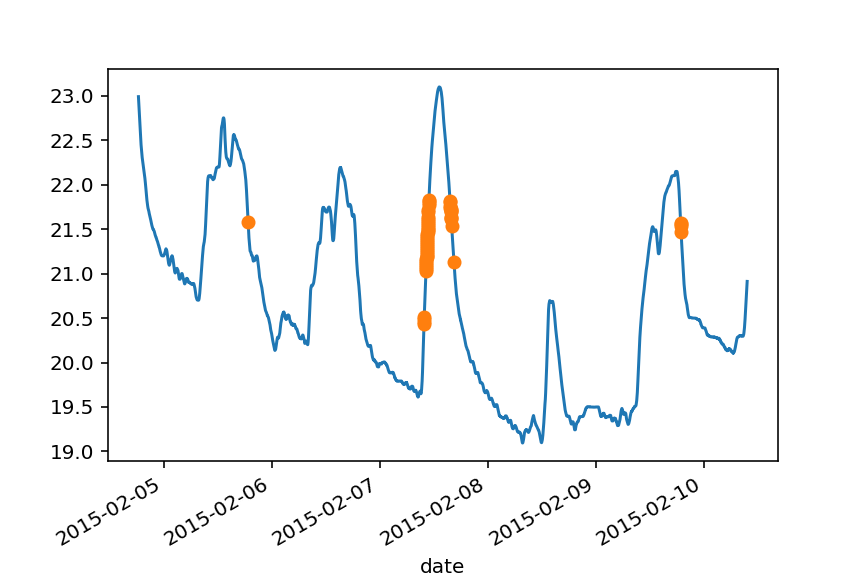

In [15]:
text = "<br>\n# Room Occupancy\nSelect the variable, and the time window for smoothing"
p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
p

In [16]:
i[0][2]

IntSlider(end=20, name='sigma', start=1, value=10)

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=10)
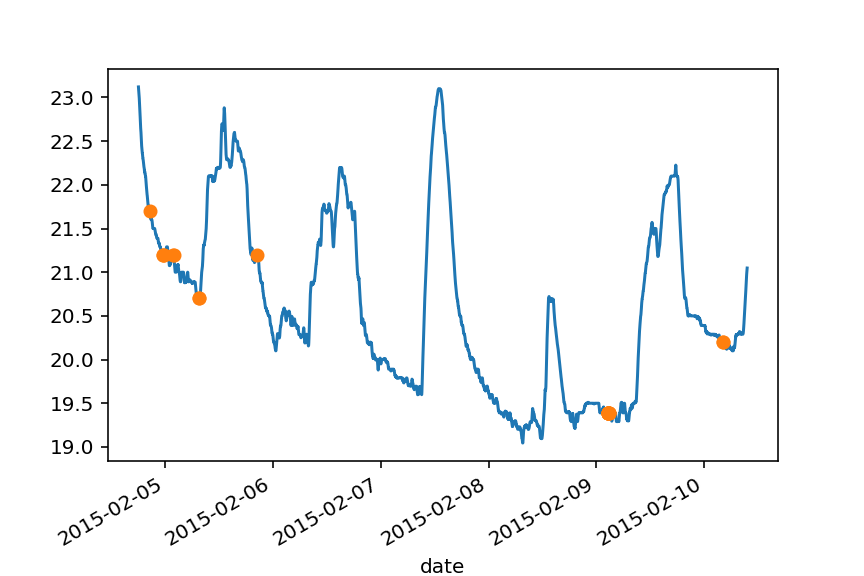

In [17]:
import panel.widgets as pnw

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

reactive_outliers = pn.bind(find_outliers, variable, window, 10)

widgets   = pn.Column("<br>\n# Room occupancy", variable, window)
occupancy = pn.Row(reactive_outliers, widgets)
occupancy

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=10)
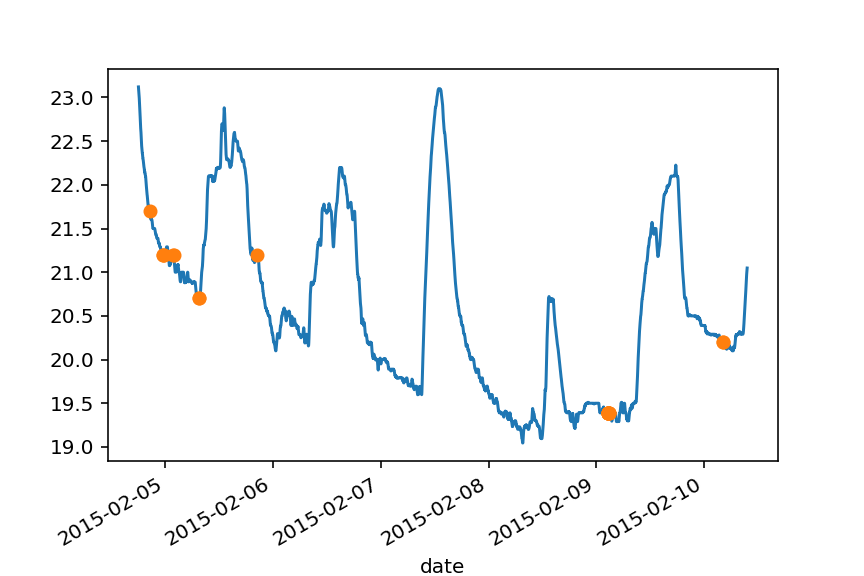

In [18]:
occupancy.servable()